In [9]:
import pandas as pd

# 读取CSV文件
df_combined = pd.read_csv('combined_smartphone_data.csv')

# 查看前几行数据，确认读取成功
print(df_combined.head())


        品牌              型号   原始价格  使用年限  外观状况    功能状况  二手价格
0    Honor        Honor 20   2969     2  轻微划痕  部分功能故障  1200
1    Apple   iPhone 11 Pro  10276     5    完好    功能正常  7139
2   Xiaomi           Mi 11   2000     1  严重损坏    功能正常   665
3   Xiaomi   Redmi Note 10   2000     1  严重损坏    功能正常   646
4  Samsung  Galaxy Note 20   2008     1  中度磨损    功能正常  1185


均方误差: 348278.58
R方值: 0.90


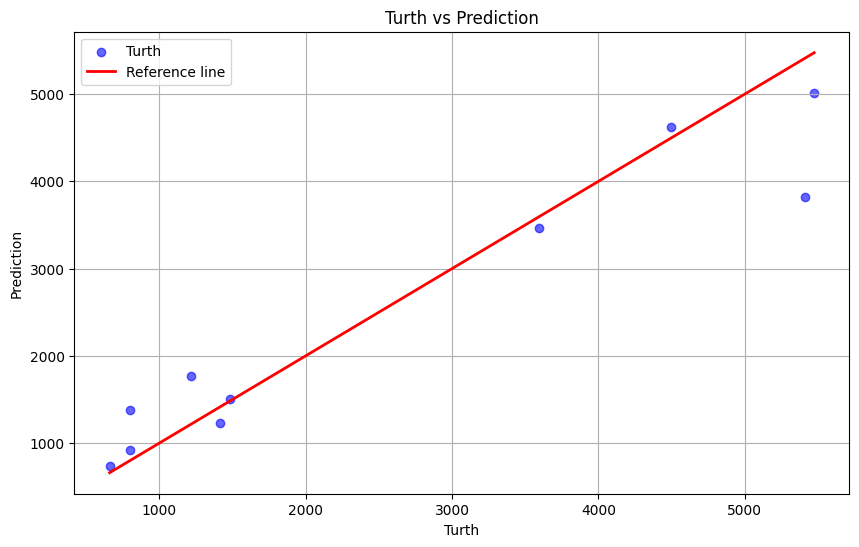

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error, r2_score
# Splitting the combined data into training and test sets
X = df_combined[['品牌', '型号', '原始价格', '使用年限', '外观状况', '功能状况']]
y = df_combined['二手价格']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ['原始价格', '使用年限']
categorical_features = ['品牌', '型号', '外观状况', '功能状况']

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline with a Linear Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predicting the test data
y_pred = model.predict(X_test)

# Calculate mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R^2 score
print(f'均方误差: {mse:.2f}')
print(f'R方值: {r2:.2f}')

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Turth')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth=2, label='Reference line')
plt.xlabel('Turth')
plt.ylabel('Prediction')
plt.title('Turth vs Prediction')
plt.legend()
plt.grid(True)
plt.show()

'/content'